In [2]:
# pip install xesmf
# !pip install climate_indices


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# pip install xclim 

In [5]:
import xclim 
import xarray as xr
from pathlib import Path
# import dask 
import os 

In [6]:
from Barcelona import indicators_Barcelona as iB 

In [7]:
import numpy as np 
import xarray as xr

# import geopandas as gpd


# import rioxarray
# import xarray
# from shapely.geometry import mapping


In [8]:
path_data = Path('/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/monthly/pr/')
outpath = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/indicators/spi3/'

# Catalonia
lat_min, lat_max = 40.3, 42.6
lon_min, lon_max = -1.3, 3.4

# nc_files = list(path_data.glob("*_V1.1.nc") )
# nc_files


In [9]:
# tmp = xr.open_dataset('/mnt/stg/climate/EMO_1/pr/mon/nc/high-resolution/EMO-1arcmin-pr_1990.nc')
# chelsa =  xr.open_dataset("/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/mon/pr/CHELSA_EUR11_pr_day_1990_V1.1.nc")
# tmp_regrid =  tmp.interp(lat=chelsa.lat, lon=chelsa.lon)
# mask = tmp_regrid.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)).isel(time=1)

In [10]:
tmp = xr.open_dataset('/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/daily/tasmax/mask.nc')
mask = tmp['tasmax'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)).isel(time=0)

In [12]:
mask

<xarray.DataArray 'tasmax' (lat: 276, lon: 564)> Size: 623kB
[155664 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 8B 2002-01-01T12:00:00
  * lon      (lon) float64 5kB -1.296 -1.288 -1.279 -1.271 ... 3.379 3.387 3.396
  * lat      (lat) float64 2kB 40.3 40.31 40.32 40.33 ... 42.57 42.58 42.59 42.6
Attributes:
    standard_name:  air_temperature
    long_name:      Daily Maximum Near-Surface Air Temperature
    units:          Celsius
    grid_mapping:   crs

In [13]:
years = range(1990, 2006)

data_dir = '/mnt/stg/climate/CHELSA/CHELSA_EUR11/obs/mon/pr/' 
datasets = []

for year in years:
    file_path = os.path.join(data_dir, f"CHELSA_EUR11_pr_day_{year}_V1.1.nc")
    try:
        # with xr.open_dataset(file_path,chunks={'lat':100, 'lon':100, 'time':100},engine="netcdf4") as ds:
        with xr.open_dataset(file_path,engine="netcdf4") as ds:
            # Subset before loading into memory
            ds_subset = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))
            # correct the values 
            # ds_subset = ds_subset.where(ds_subset <= 200000) 
            # scale 
            ds_subset = ds_subset*0.01             
            # rename 
            ds_subset = ds_subset.rename({'Band1':'pr'})
            # mask
            ds_subset_masked = ds_subset.where(mask.notnull())
            # Actually load data into memory now
            datasets.append(ds_subset_masked.load())
            print(f"Year {year}: loaded")
    except Exception as e:
        print(f"Skipping year {year}: {e}")

# Concatenate all loaded subsets along the time dimension
combined = xr.concat(datasets, dim="time")


Year 1990: loaded
Year 1991: loaded
Year 1992: loaded
Year 1993: loaded
Year 1994: loaded
Year 1995: loaded
Year 1996: loaded
Year 1997: loaded
Year 1998: loaded
Year 1999: loaded
Year 2000: loaded
Year 2001: loaded
Year 2002: loaded
Year 2003: loaded
Year 2004: loaded
Year 2005: loaded


In [ ]:
combined

In [ ]:
combined['pr'].isel(time=1).plot()

In [ ]:
combined2 = combined.copy(deep=True)

In [14]:
import pandas as pd

# Create monthly date range from 1990-01-01 to 2005-12-01 (start of each month)
time_index = pd.date_range(start='1990-01-01', end='2005-12-31', freq='MS')  # MS = month start

# Assign to your dataset (assuming 'time' is the time dimension)
combined = combined.assign_coords(time=time_index)

print(combined.time.values)


['1990-01-01T00:00:00.000000000' '1990-02-01T00:00:00.000000000'
 '1990-03-01T00:00:00.000000000' '1990-04-01T00:00:00.000000000'
 '1990-05-01T00:00:00.000000000' '1990-06-01T00:00:00.000000000'
 '1990-07-01T00:00:00.000000000' '1990-08-01T00:00:00.000000000'
 '1990-09-01T00:00:00.000000000' '1990-10-01T00:00:00.000000000'
 '1990-11-01T00:00:00.000000000' '1990-12-01T00:00:00.000000000'
 '1991-01-01T00:00:00.000000000' '1991-02-01T00:00:00.000000000'
 '1991-03-01T00:00:00.000000000' '1991-04-01T00:00:00.000000000'
 '1991-05-01T00:00:00.000000000' '1991-06-01T00:00:00.000000000'
 '1991-07-01T00:00:00.000000000' '1991-08-01T00:00:00.000000000'
 '1991-09-01T00:00:00.000000000' '1991-10-01T00:00:00.000000000'
 '1991-11-01T00:00:00.000000000' '1991-12-01T00:00:00.000000000'
 '1992-01-01T00:00:00.000000000' '1992-02-01T00:00:00.000000000'
 '1992-03-01T00:00:00.000000000' '1992-04-01T00:00:00.000000000'
 '1992-05-01T00:00:00.000000000' '1992-06-01T00:00:00.000000000'
 '1992-07-01T00:00:00.000

In [15]:
print(combined['time_bnds'].values[:5])


[[[[199001.01 199001.01 199001.01 ...       nan       nan       nan]
   [199001.01 199001.01 199001.01 ...       nan       nan       nan]
   [199001.01 199001.01 199001.01 ...       nan       nan       nan]
   ...
   [199001.01 199001.01 199001.01 ...       nan       nan       nan]
   [199001.01 199001.01 199001.01 ...       nan       nan       nan]
   [199001.01 199001.01 199001.01 ...       nan       nan       nan]]

  [[199001.31 199001.31 199001.31 ...       nan       nan       nan]
   [199001.31 199001.31 199001.31 ...       nan       nan       nan]
   [199001.31 199001.31 199001.31 ...       nan       nan       nan]
   ...
   [199001.31 199001.31 199001.31 ...       nan       nan       nan]
   [199001.31 199001.31 199001.31 ...       nan       nan       nan]
   [199001.31 199001.31 199001.31 ...       nan       nan       nan]]]


 [[[199002.01 199002.01 199002.01 ...       nan       nan       nan]
   [199002.01 199002.01 199002.01 ...       nan       nan       nan]
   [199002.01 

In [16]:
# txx = iB.txx(combined['tasmax'])
spi3 = iB.spi3(combined['pr'],scale=3)


/home/jovyan/T2.4_Carmine/Chelsa_histo/Barcelona/indicators_Barcelona.py:48: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  stand_prec_index = xr.apply_ufunc(compute_spi,


In [23]:
spi3.to_netcdf(f"{outpath}Spi3_Catalonia_1990_2005.nc")

In [27]:
spi3.mean(dim='time').to_netcdf(f"{outpath}Spi3_Catalonia_1990_2005_mean.nc")

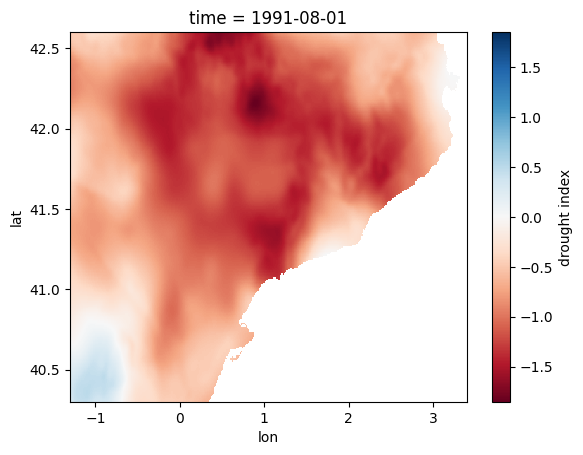

In [20]:
spi3.isel(time=19).plot(cmap='RdBu')

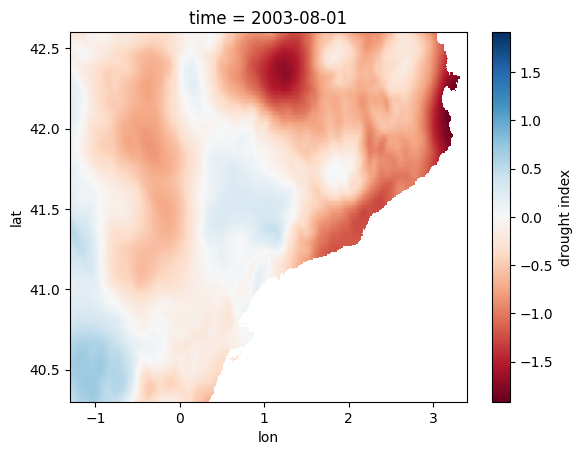

In [21]:
spi3.isel(time=163).plot(cmap='RdBu')

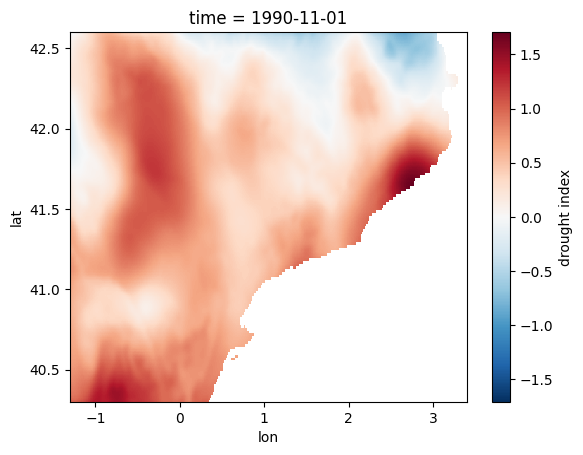

In [42]:
spi3.isel(time=7).plot(cmap='viridis_r')

In [ ]:
txx_mam.plot()

In [ ]:
print(f"{outpath}Spi3_Catalonia_1990_2005.nc")